In [1]:
import pandas as pd
import geopandas as gpd

import requests

url = "https://gis-public.sandiegocounty.gov/arcgis/rest/services/Hosted/SDAPCD_Complaints/FeatureServer/0/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=nature_of_complaint%2C+date_received%2C+record_number%2C+record_status%2Cinvestigation_outcome%2C+response_duration__hours_%2C+x_coordinate%2C+y_coordinate%2C+cross_street___intersection&returnGeometry=true&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&gdbVersion=&historicMoment=&returnDistinctValues=false&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&multipatchOption=xyFootprint&resultOffset=&resultRecordCount=&returnTrueCurves=false&returnCentroid=false&timeReferenceUnknownClient=false&sqlFormat=none&resultType=&datumTransformation=&lodType=geohash&lod=&lodSR=&f=geojson"

In [3]:

df = gpd.read_file(url)

In [4]:
df.columns

Index(['x_coordinate', 'nature_of_complaint', 'record_status', 'record_number',
       'investigation_outcome', 'date_received', 'response_duration__hours_',
       'cross_street___intersection', 'y_coordinate', 'geometry'],
      dtype='object')

In [82]:
# add a human readable
df['datetime']=pd.to_datetime(df['date_received'],unit='ms')

df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

df['date']

df['hour']=df['datetime'].dt.hour

df['hour'].unique()

array([ 7.,  8., nan])

In [6]:
issue_df=df[(df['x_coordinate']==-117.081305) & (df['y_coordinate']==32.552044)]
issue_df

,x_coordinate,nature_of_complaint,record_status,record_number,investigation_outcome,date_received,response_duration__hours_,cross_street___intersection,y_coordinate,geometry
880,-117.081305,Odor,Closed,APCD2023-CMP-0460,Outside APCD Jurisdiction,1.694156e+12,7.650000,Caspian Wy and N McCoy Trl,32.552044,POINT (-117.0813 32.55204)
883,-117.081305,Odor,Closed,APCD2023-CMP-0463,Outside APCD Jurisdiction,1.694243e+12,0.166667,N/A,32.552044,POINT (-117.0813 32.55204)
886,-117.081305,Odor,Closed,APCD2023-CMP-0466,Outside APCD Jurisdiction,1.694243e+12,0.800000,Caspian Wy and N McCoy Trl,32.552044,POINT (-117.0813 32.55204)
1591,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1.721545e+12,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
1600,-117.081305,Odor,Closed,APCD2024-CMP-0470,Enforcement Action Taken,1.721632e+12,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
...,...,...,...,...,...,...,...,...,...,...
5433,-117.081305,Odor,Open,APCD2025-CMP-0745,None,1.744614e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
5434,-117.081305,Odor,Open,APCD2025-CMP-0746,None,1.744441e+12,NaN,Caspian Way & 03rd St,32.552044,POINT (-117.0813 32.55204)
5435,-117.081305,Odor,Open,APCD2025-CMP-0747,None,1.744355e+12,NaN,Caspian Way & 03rd St,32.552044,POINT (-117.0813 32.55204)
5436,-117.081305,Odor,Open,APCD2025-CMP-0748,None,1.744441e+12,NaN,Caspian Way & 03rd St,32.552044,POINT (-117.0813 32.55204)


In [15]:
issue_df['cross_street___intersection'].unique()

array(['Caspian Wy and N McCoy Trl', 'N/A',
       'Caspian Way and N McCoy Trail', '3rd St and Imperial Beach Blvd',
       'Terrace Pine Dr and Terrace Pine Ln',
       'Seacoast Dr and Imperial Beach Blvd',
       'Seacoast Dr and Citrus Ave', '9th St and Grove Ave',
       'Calla Ave and 10th St', 'Saturn Blvd and Donax Ave',
       '16th St and Halo St', 'Oneonta and Connecticut St',
       'Leon Ave and Bubbling Well Dr',
       'W San Ysidro Blvd and Via Suspiro', 'Evergreen Ave and 2nd St',
       'Hollister St and Monument Rd', 'Tijuana River Valley (US/MX)',
       'Carnation Ave and Calla Ave', 'Clearwater Way and Dairy Mart Rd',
       'Maxwell Rd and Main St', 'Caspian Way and McCoy Trail',
       'Caspian Way and N. McCoy Trail', 'Connecticut St & Hemlock Ave',
       'Oneonta Ave & Connecticut St', 'Elder Ave & 03rd St',
       'Transite Ave & Halley St', 'Caspian Way & 03rd St',
       'Caspian Wy and N McCoy Trail', 'Caspian Way and N McCoy Trai',
       '301 Caspian W

In [9]:
df['cross_street___intersection'].unique()


array(['Enrico Fermi Pl and Kellianne Wy', 'Reynard Wy and Curlew St',
       'Misison Gorge Rd and Princess View Dr', ...,
       'Arnold Ave & Myrtle Ave', 'N Marshall Ave and Vernon Way',
       'Lawndale St & Wardlow Ave'], dtype=object)

In [13]:
df[df['cross_street___intersection']== 'Caspian Way and N McCoy Trail']

,x_coordinate,nature_of_complaint,record_status,record_number,investigation_outcome,date_received,response_duration__hours_,cross_street___intersection,y_coordinate,geometry
1289,-117.126302,Odor,Closed,APCD2024-CMP-0137,None,1.709366e+12,NaN,Caspian Way and N McCoy Trail,32.574803,POINT (-117.1263 32.5748)
1432,-117.126488,Odor,Closed,APCD2024-CMP-0288,Outside APCD Jurisdiction,1.715324e+12,2.150000,Caspian Way and N McCoy Trail,32.574795,POINT (-117.12649 32.5748)
1591,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1.721545e+12,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
1600,-117.081305,Odor,Closed,APCD2024-CMP-0470,Enforcement Action Taken,1.721632e+12,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
1602,-117.081305,Odor,Closed,APCD2024-CMP-0472,Enforcement Action Taken,1.721632e+12,0.333333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
...,...,...,...,...,...,...,...,...,...,...
5426,-117.081305,Odor,Open,APCD2025-CMP-0734,None,1.744614e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
5428,-117.081305,Odor,Open,APCD2025-CMP-0736,None,1.744614e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
5429,-117.081305,Odor,Open,APCD2025-CMP-0737,None,1.744614e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
5430,-117.081305,Odor,Open,APCD2025-CMP-0738,None,1.744614e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)


In [12]:
df[df['cross_street___intersection']== 'Caspian Way and N McCoy Trail'].drop_duplicates(subset=['cross_street___intersection','x_coordinate','y_coordinate'])

,x_coordinate,nature_of_complaint,record_status,record_number,investigation_outcome,date_received,response_duration__hours_,cross_street___intersection,y_coordinate,geometry
1289,-117.126302,Odor,Closed,APCD2024-CMP-0137,None,1.709366e+12,NaN,Caspian Way and N McCoy Trail,32.574803,POINT (-117.1263 32.5748)
1432,-117.126488,Odor,Closed,APCD2024-CMP-0288,Outside APCD Jurisdiction,1.715324e+12,2.150000,Caspian Way and N McCoy Trail,32.574795,POINT (-117.12649 32.5748)
1591,-117.081305,Odor,Open,APCD2024-CMP-0460,Enforcement Action Taken,1.721545e+12,0.283333,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
1865,-117.081300,Odor,Closed,APCD2024-CMP-0753,None,1.722668e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.0813 32.55204)
1872,-116.988490,Odor,Closed,APCD2024-CMP-0761,None,1.722841e+12,NaN,Caspian Way and N McCoy Trail,32.645264,POINT (-116.98849 32.64526)
2034,-117.055443,Odor,Closed,APCD2024-CMP-0929,None,1.723100e+12,NaN,Caspian Way and N McCoy Trail,32.584619,POINT (-117.05544 32.58462)
2072,-117.132239,Odor,Closed,APCD2024-CMP-0971,None,1.723187e+12,NaN,Caspian Way and N McCoy Trail,32.571326,POINT (-117.13224 32.57133)
2200,-117.087525,Odor,Closed,APCD2024-CMP-1112,None,1.723446e+12,NaN,Caspian Way and N McCoy Trail,32.575632,POINT (-117.08752 32.57563)
2224,-117.080000,Odor,Closed,APCD2024-CMP-1137,None,1.723446e+12,NaN,Caspian Way and N McCoy Trail,32.552044,POINT (-117.08 32.55204)
2334,-117.016541,Odor,Closed,APCD2024-CMP-1256,None,1.723619e+12,NaN,Caspian Way and N McCoy Trail,32.601753,POINT (-117.01654 32.60175)


<Axes: >

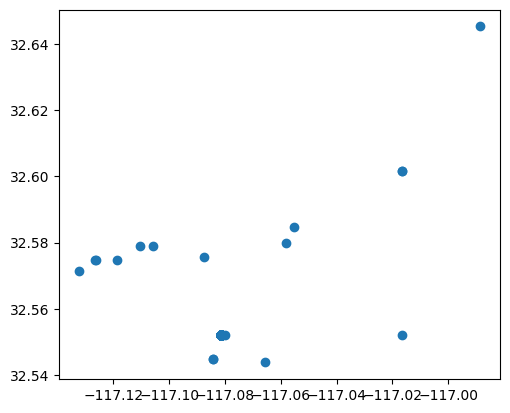

In [14]:
df[df['cross_street___intersection']== 'Caspian Way and N McCoy Trail'].plot()